# Nordeus Data Science Challenge - Solution by Uros Pantelic
 
 
 

##  Introduction

Welcome to my solution for the Nordeus Data Science Challenge.

                                          






# 1. Packages


In the following cell, I'll import the required libraries and set up the initial environment for our data science solution.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score



2023-11-20 12:51:34.551493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Loading the Dataset

Now, let's load the dataset for the Nordeus Data Science Challenge. We have two files: `jobfair_train.csv` for training data and `jobfair_test.csv` for testing data.

In [2]:
fajl = pd.read_csv('jobfair_train.csv')
fajl_test = pd.read_csv('jobfair_test.csv')
fajl

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55309,173,14278145,2906514,0) NonPayer,2,25,4.160909,3.948086,0.503241,11,...,Switzerland,iOS Phone,13,25,NaN,42,10,25,37,1
55310,173,14309556,2906913,2) Minnow,2,21,4.244145,3.762286,0.664514,28,...,France,iOS Phone,25,167,NaN,214,158,358,256,1
55311,173,14455654,2905985,0) NonPayer,1,21,4.000158,3.753276,0.507620,6,...,France,iOS Tablet,14,17,NaN,73,11,70,57,11
55312,173,13623733,2910437,0) NonPayer,5,24,4.582158,4.461391,0.664767,28,...,Morocco,Android Phone,22,80,4.0,90,65,109,150,5


# 3. Handling Missing Values

In our data exploration, we're checking our datasets using the `info()` function.

We noticed that in both the training and testing datasets, there are some places where we don't have information about the 'global_competition_level.' 

To deal with this, we're assuming that if there's no level mentioned, it means the associations don't have a specific rank on a global scale. So, we're filling these blank spaces with 0, indicating no assigned level.



In [3]:
fajl.info()
fajl_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   55314 non-null  int64  
 1   club_id                                  55314 non-null  int64  
 2   league_id                                55314 non-null  int64  
 3   dynamic_payment_segment                  55314 non-null  object 
 4   cohort_season                            55314 non-null  int64  
 5   avg_age_top_11_players                   55314 non-null  int64  
 6   avg_stars_top_11_players                 55314 non-null  float64
 7   avg_stars_top_14_players                 55314 non-null  float64
 8   avg_training_factor_top_11_players       55314 non-null  float64
 9   days_active_last_28_days                 55314 non-null  int64  
 10  league_match_watched_count_last_28_days  55314

In [4]:
fajl['global_competition_level'].fillna(0, inplace=True)
fajl_test['global_competition_level'].fillna(0, inplace=True)

In [5]:
print(fajl.value_counts('dynamic_payment_segment'))
print(fajl_test.value_counts('dynamic_payment_segment'))

dynamic_payment_segment
0) NonPayer    41843
2) Minnow       6047
1) ExPayer      5025
3) Dolphin      1854
4) Whale         545
Name: count, dtype: int64
dynamic_payment_segment
0) NonPayer    45780
2) Minnow       6509
1) ExPayer      5447
3) Dolphin      1967
4) Whale         567
Name: count, dtype: int64


# 4. Simplifying the Dataset

As we get our data ready for analysis, we've found that the 'season' and 'club_id' information doesn't really help us with what we want to learn. So, in the next step, we're getting rid of these details from both the training and testing datasets.

In [6]:
fajl.drop(['season', 'club_id','registration_country'], axis=1, inplace=True)
fajl_test.drop(['season', 'club_id','registration_country'], axis=1, inplace=True)

# 5 Dealing with Categorical Variables

To facilitate the analysis, we need to convert categorical variables into a format suitable for machine learning models.


## 5.1 Dealing with the First Categorical Variable: 'dynamic_payment_segment'


## Understanding Label Encoding

In the analysis of our dataset, we explored the relationship between the 'dynamic_payment_segment' feature and the 'league_rank,' aiming to understand how different spending categories correlate with user ranks.

## Initial Insights

Upon calculating the average league rank for each spending category, we observed a logical trend: users who spend more in the game tend to achieve better ranks on average. This insight suggests that there is an ordinal relationship among spending categories, with a clear hierarchy based on user engagement.

## Choosing Label Encoding

To represent this ordinal relationship in our model, we opted for label encoding over one-hot encoding. Label encoding assigns numerical labels to categories based on their order, preserving the inherent hierarchy in the data. Given that the spending categories exhibit a meaningful progression, label encoding is a suitable choice.

Average League Rank for Each Spending Category:
dynamic_payment_segment
0) NonPayer    7.926774
1) ExPayer     7.281791
2) Minnow      5.723665
3) Dolphin     4.997843
4) Whale       4.966972
Name: league_rank, dtype: float64


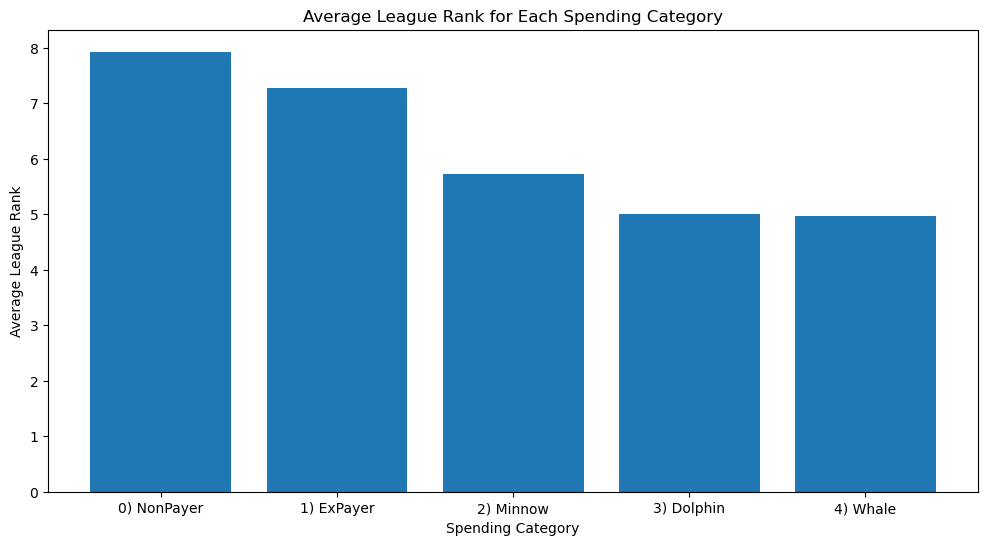

In [7]:
average_rank_per_category = fajl.groupby('dynamic_payment_segment')['league_rank'].mean()

print("Average League Rank for Each Spending Category:")
print(average_rank_per_category)

average_rank_per_category = fajl.groupby('dynamic_payment_segment')['league_rank'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_rank_per_category.index, average_rank_per_category)
plt.title("Average League Rank for Each Spending Category")
plt.xlabel("Spending Category")
plt.ylabel("Average League Rank")
plt.show()


In [8]:
label_encoder = LabelEncoder()
fajl['dynamic_payment_segment'] = label_encoder.fit_transform(fajl['dynamic_payment_segment'])
fajl_test['dynamic_payment_segment'] = label_encoder.fit_transform(fajl_test['dynamic_payment_segment'])

In [9]:
fajl['dynamic_payment_segment']
fajl_test['dynamic_payment_segment']

0        0
1        0
2        0
3        0
4        0
        ..
60265    3
60266    0
60267    0
60268    0
60269    3
Name: dynamic_payment_segment, Length: 60270, dtype: int64


# 5.2 Dealing with the Categorical Variable: 'registration_platform_specific'

## Initial Insights

After calculating the average league rank for each registration platform category, we can discern patterns in user ranks. However, from both a logical perspective and the insights gained from the histogram, it becomes apparent that this feature may not significantly contribute to our analysis.

Average League Rank for Each Spending Category:
registration_platform_specific
Android Phone               7.398198
Android Tablet              7.438136
Flash FB Canvas             8.364516
Flash TE Site               7.714286
UniversalWindows PC         7.907459
WebGL FB Canvas             7.823362
WebGL TE Site               7.216769
WebGL or Flash FB Canvas    6.589147
WebGL or Flash TE Site      6.823529
iOS Phone                   7.489794
iOS Tablet                  7.371499
Name: league_rank, dtype: float64


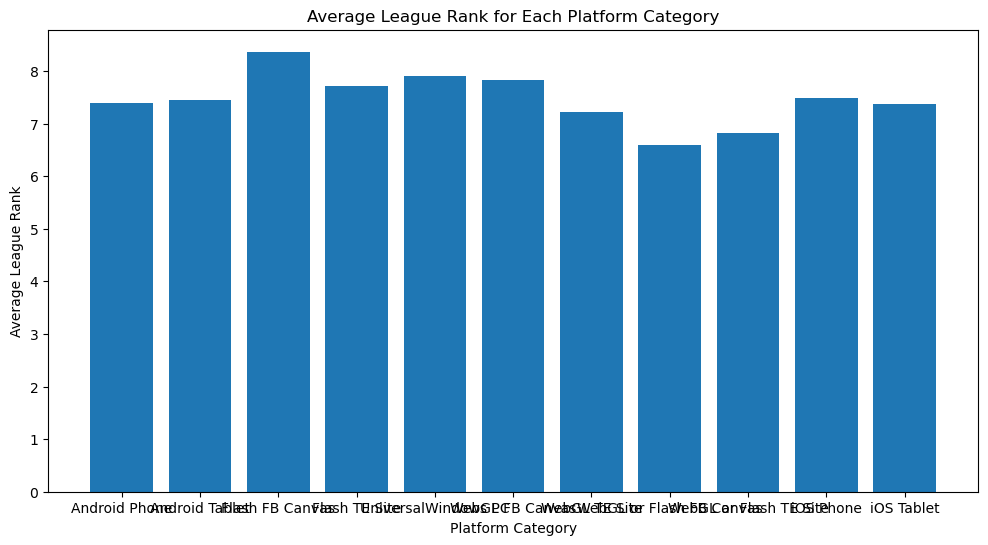

In [10]:
average_rank_per_category = fajl.groupby('registration_platform_specific')['league_rank'].mean()

print("Average League Rank for Each Spending Category:")
print(average_rank_per_category)

average_rank_per_category = fajl.groupby('registration_platform_specific')['league_rank'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_rank_per_category.index, average_rank_per_category)
plt.title("Average League Rank for Each Platform Category")
plt.xlabel("Platform Category")
plt.ylabel("Average League Rank")
plt.show()


In [11]:
fajl.drop(['registration_platform_specific',], axis=1, inplace=True)
fajl_test.drop(['registration_platform_specific'], axis=1, inplace=True)

# 6. Exploring Feature Distributions Across the Dataset

In this analysis, we broaden our perspective by visualizing the distributions of multiple features simultaneously across the entire dataset. The provided code snippet generates histograms for each feature, offering a comprehensive view of their individual distributions.
Visualizing Feature Distributions

## Importance of Comprehensive Visualization

Identifying Patterns: By examining the histograms collectively, we can identify potential relationships, trends, or outliers within the dataset.

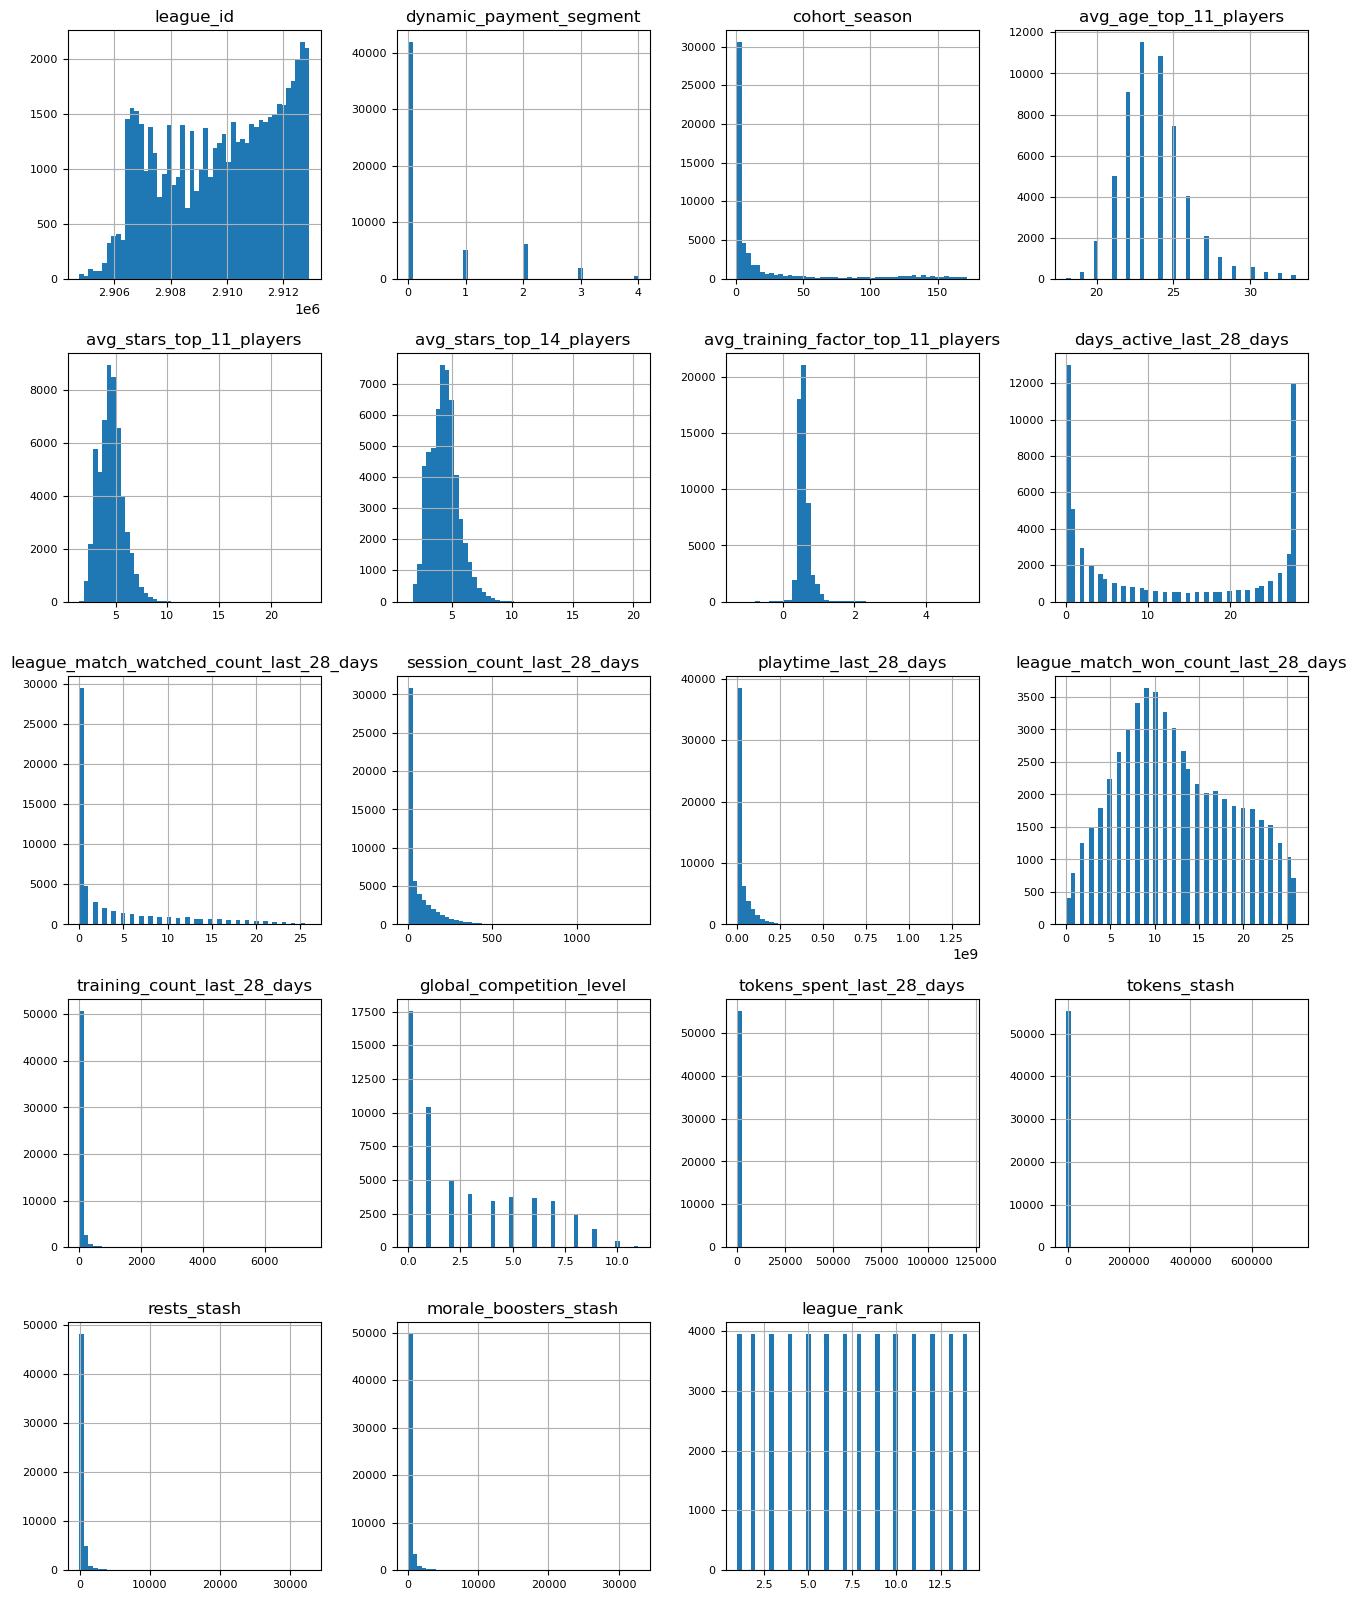

In [12]:
fajl.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Understanding Feature Distributions

In this analysis, we delve into the distribution of a specific feature, 'feature_to_compare,' in both the training and test datasets. Visualizing the distribution provides valuable insights into the nature of the data and helps us make informed decisions during the modeling process.

## Importance of Feature Distribution

Examining the distribution of features is crucial for several reasons:

    Identifying Patterns: Visualization allows us to identify patterns, outliers, or irregularities in the data, offering a deeper understanding of each feature's behavior.
    
    Model Performance: A model trained on data with representative feature distributions is more likely to generalize well to new, unseen data. Consistent feature distributions contribute to better model performance.
    
    Ensuring Generalization: Similar distributions in the training and test datasets enhance the model's ability to generalize patterns learned during training. This is essential for the model to perform well on new, real-world data by recognizing similar patterns encountered during training.
## Utilizing the Code for Comparison

To compare the distribution of any feature from the list below between the training and test datasets, you can simply copy and paste the code, replacing 'feature_to_compare' with the desired feature:

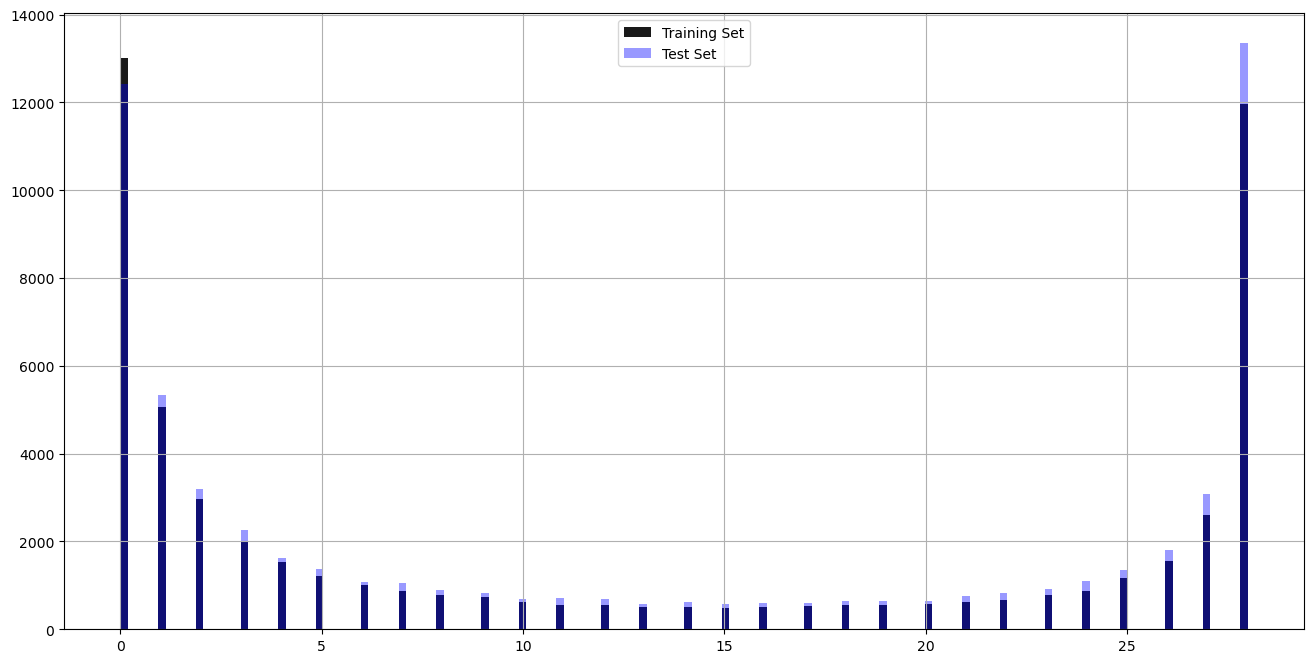

In [13]:

# LIST OF FEATURES

# dynamic_payment_segment
# cohort_season
# avg_age_top_11_players
# avg_stars_top_11_players
# avg_stars_top_14_players
# avg_training_factor_top_11_players
# days_active_last_28_days
# league_match_watched_count_last_28_days
# session_count_last_28_days
# playtime_last_28_days
# league_match_won_count_last_28_days
# training_count_last_28_days
# global_competition_level
# tokens_spent_last_28_days
# tokens_stash
# rests_stash
# morale_boosters_stash


# Specify the feature you want to compare
feature_to_compare = 'days_active_last_28_days'

fajl[feature_to_compare].hist(figsize=(16, 8), bins=150, color='black', alpha=0.9, label='Training Set')

fajl_test[feature_to_compare].hist(bins=150, color='blue', alpha=0.4, label='Test Set')

plt.legend()

plt.show()


In [14]:
print(fajl.info())
print(fajl_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  int64  
 3   avg_age_top_11_players                   55314 non-null  int64  
 4   avg_stars_top_11_players                 55314 non-null  float64
 5   avg_stars_top_14_players                 55314 non-null  float64
 6   avg_training_factor_top_11_players       55314 non-null  float64
 7   days_active_last_28_days                 55314 non-null  int64  
 8   league_match_watched_count_last_28_days  55314 non-null  int64  
 9   session_count_last_28_days               55314 non-null  int64  
 10  playtime_last_28_days                    55314

# 7. Correlation Matrix Analysis:

## In this section, we delve into the correlation matrix of the dataset to gain insights into feature relationships. The matrix provides a comprehensive view of how each feature correlates with others.

    Correlation Heatmap:
A heatmap is generated using the Seaborn library to visualize the correlation matrix. Each cell in the heatmap represents the correlation coefficient between two features. The color intensity indicates the strength of the correlation, ranging from cool (negative correlation) to warm (positive correlation).

    Feature Relationships:
The correlation matrix reveals relationships among different features. Notable correlations, such as the positive correlation between 'avg_stars_top_11_players' and 'avg_stars_top_14_players,' are identified.

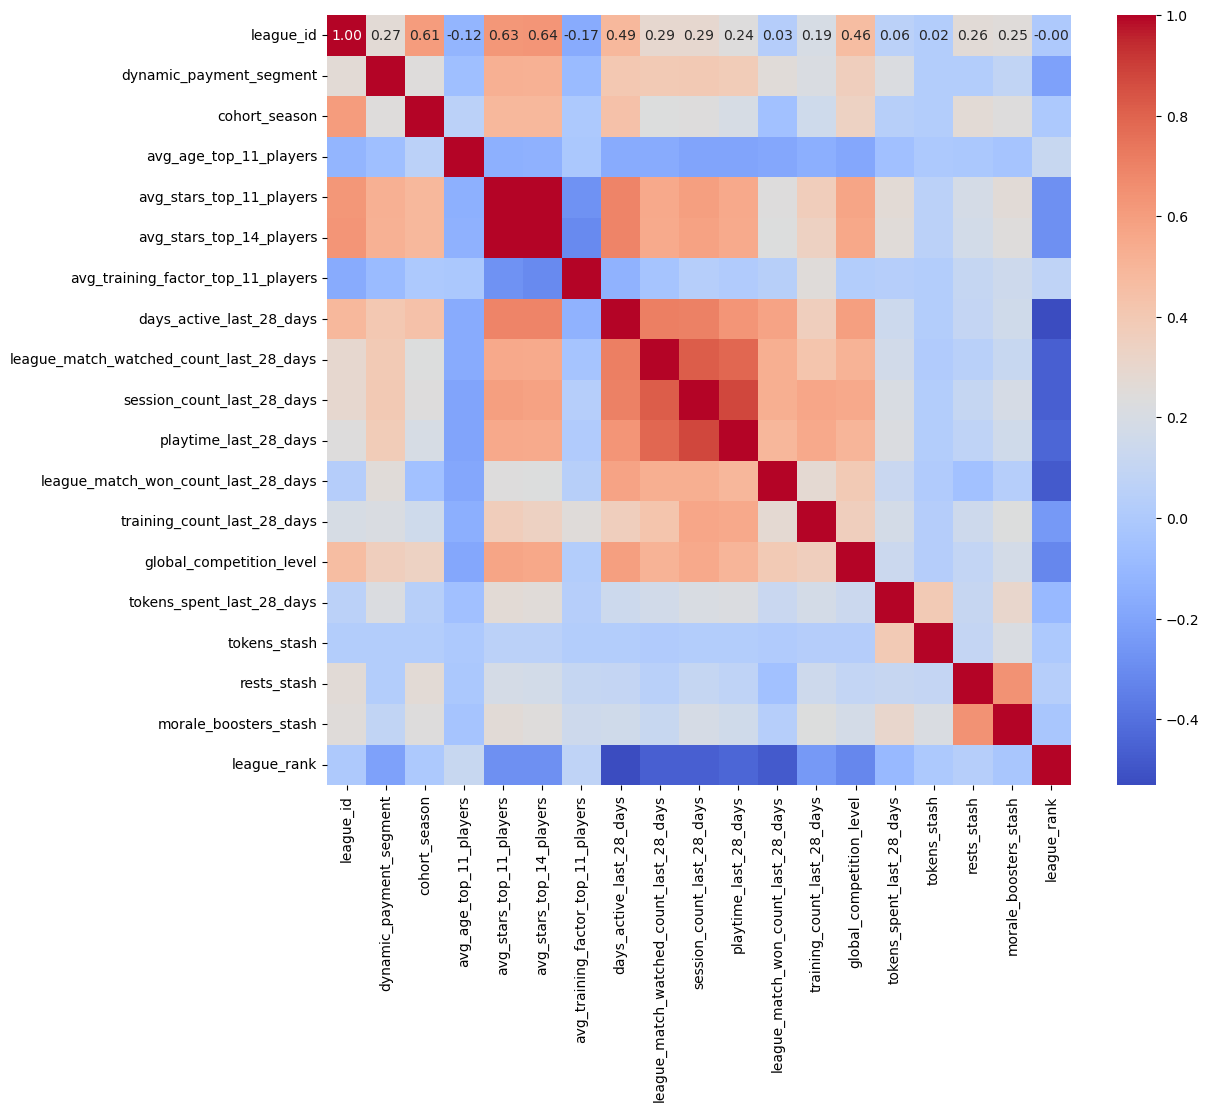

In [15]:
import seaborn as sns


correlation_matrix = fajl.corr()
#correlation_matrix = fajl_test.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# 8. Exploring All Features: Correlation vs. Performance

## In this section, we will explore the impact of using all features, regardless of their correlation, and then proceed to clean the dataset by addressing correlated and uncorrelated features.

## Using All Features:
Initially, we will employ all available features in our dataset. This includes both correlated and uncorrelated features. Two models will be trained:

    a. Random Forest Classifier:
We will utilize a Random Forest Classifier to understand how well the model performs with the entire feature set.

    b. Neural Networks:
Additionally, we will experiment with a Neural Network model to compare its performance against the Random Forest Classifier.

In [169]:
X = fajl.drop(['league_rank'], axis=1)
X_test_final=fajl_test

y = fajl['league_rank']
y_encoded = pd.get_dummies(y, columns=['league_rank'], prefix='rank')
y_encoded = y_encoded.values.astype(int)
X_random=fajl.drop(['league_id','league_rank'],axis=1)
print(fajl.shape)
print(X.shape)
print(X_random.shape)
print(X_test_final.shape)
print(y.shape)
print(y[:10])
print(y_encoded[:10])
print(X.info())
print(X_test_final.info())

(55314, 19)
(55314, 18)
(55314, 17)
(60270, 18)
(55314,)
0     2
1     2
2     1
3     6
4    10
5     2
6     2
7    12
8     7
9     5
Name: league_rank, dtype: int64
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  int64  
 3   avg_age_top_11_players                   55314 non-null 

##  a) Based on the provided Mean Absolute Error (MAE) values, it suggests that the model is performing perfectly on the training set (MAE of 0.0), but there is a discrepancy on the validation set (MAE of 2.66). This discrepancy between training and validation performance is a sign of overfitting.

Overfitting occurs when a model learns the training data too well, including its noise and specific patterns, to the extent that it performs poorly on new, unseen data (validation set).

To address overfitting, you might consider:

    Adjusting Model Complexity: Tweak hyperparameters of the Random Forest model, like the maximum depth of the trees, minimum samples per leaf, or the number of trees.
    
    1st try:
    Training Mean Absolute Error: 0.0
    Validation Mean Absolute Error: 2.6575070053330925
    
    Best i got:
    Training Mean Absolute Error: 2.029106686854534
    Validation Mean Absolute Error: 2.71110910241345
    
    Reduced overfitting but algorithm is still bad.
    


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Assuming X is your feature set and y is your target variable
# X.shape should be (55314, num_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_random)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

rf_classifier = RandomForestClassifier(
    n_estimators=5,          # Number of trees in the forest
    max_depth=10,               # Maximum depth of the trees
    #min_samples_split=50,        # Minimum number of samples required to split an internal node
    min_samples_leaf=10,         # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Compute training Mean Absolute Error
train_mae = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error: {train_mae}')

# Make predictions on the test set
y_val_pred = rf_classifier.predict(X_val)

# Compute validation Mean Absolute Error
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f'Validation Mean Absolute Error: {val_mae}')


Training Mean Absolute Error: 2.585578899292076
Validation Mean Absolute Error: 2.8919016630513377


In [183]:
X_test_final1=X_test_final.drop(['league_id'],axis=1)
X_test_final1_scaled = scaler.fit_transform(X_test_final1)

y_train_pred = rf_classifier.predict(X_test_final1_scaled)
predictions_df = pd.DataFrame({'Predictions': y_train_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [48]:
print(y_train[:5])
print(y_train_pred[:5])

print(y_val[:5])
print(y_val_pred[:5])


31249    12
40507    10
466      11
47425    12
19155     6
Name: league_rank, dtype: int64
[ 9  6 11 11  3]
34777     4
273      12
53857     5
13103     1
4948      3
Name: league_rank, dtype: int64
[ 6 11  7  1  3]


In [63]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam

# Assuming X is your feature set and y is your target variable
# X.shape should be (55314, num_features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
y_train -= 1
y_val -= 1
num_features=18

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(num_features,)),
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')  # Assuming 14 classes
])

learning_rate = 0.001
# Compile the model
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_val_pred = model.predict(X_val)
y_val_pred_classes = tf.argmax(y_val_pred, axis=1)
mae = mean_absolute_error(y_test, y_val_pred_classes.numpy())
print(f'Test Mean Absolute Error: {mae}')

87/87 [==============================] - 1s 5ms/step
Test Mean Absolute Error: 2.64352856109906


In [64]:
y_train_pred = model.predict(X_train)
y_train_pred_classes = tf.argmax(y_train_pred, axis=1)
mae = mean_absolute_error(y_train, y_train_pred_classes.numpy())
print(f'Train Mean Absolute Error: {mae}')

1643/1643 [==============================] - 6s 4ms/step
Train Mean Absolute Error: 2.617416457334247


## Simple neural network didnt do well so i trie with more complex network. its still providing the same result.
## BUT...
 
Thats okay because im going to do little feature selection and try those algorithms on better dataset


In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Assuming X is your feature set and y is your target variable
# X.shape should be (55314, num_features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
y_train -= 1
y_test -= 1
num_features = 18

# Create an autoencoder model
input_layer = tf.keras.layers.Input(shape=(num_features,))
encoded = tf.keras.layers.Dense(256, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(num_features, activation='linear')(decoded)

autoencoder = tf.keras.models.Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=5, batch_size=8, validation_data=(X_test, X_test))

# Extract the encoder part for feature representation
encoder = tf.keras.models.Model(input_layer, encoded)

# Get the encoded representations of the training and testing data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Create a classifier on top of the encoded representations
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(128,)),
    tf.keras.layers.Dense(14, activation='softmax')  # Assuming 14 classes
])

# Compile and train the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mae'])
classifier.fit(X_train_encoded, y_train, epochs=5, batch_size=8, validation_data=(X_test_encoded, y_test))


Epoch 1/5
6569/6569 [==============================] - 14s 2ms/step - loss: 0.1069 - mae: 0.1097 - val_loss: 0.0134 - val_mae: 0.0717
Epoch 2/5
6569/6569 [==============================] - 16s 2ms/step - loss: 0.0616 - mae: 0.0873 - val_loss: 0.0160 - val_mae: 0.0737
Epoch 3/5
6569/6569 [==============================] - 15s 2ms/step - loss: 0.0967 - mae: 0.0818 - val_loss: 0.0096 - val_mae: 0.0611
Epoch 4/5
6569/6569 [==============================] - 15s 2ms/step - loss: 0.0827 - mae: 0.0755 - val_loss: 0.0360 - val_mae: 0.0932
Epoch 5/5
87/87 [==============================] - 0s 2ms/step
Epoch 1/5
6569/6569 [==============================] - 12s 2ms/step - loss: 2.3773 - mae: 6.4398 - val_loss: 2.3623 - val_mae: 6.4191
Epoch 2/5
6569/6569 [==============================] - 12s 2ms/step - loss: 2.3348 - mae: 6.4398 - val_loss: 2.3377 - val_mae: 6.4191
Epoch 3/5
6569/6569 [==============================] - 12s 2ms/step - loss: 2.3237 - mae: 6.4398 - val_loss: 2.3424 - val_mae: 6.4191

In [66]:
# Evaluate the model on the test set
y_test_encoded = encoder.predict(X_test)
y_test_pred = classifier.predict(y_test_encoded)

# Convert predicted probabilities to class labels
y_test_pred_classes = tf.argmax(y_test_pred, axis=1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred_classes.numpy())
print(f'Test Mean Absolute Error: {mae}')

87/87 [==============================] - 0s 918us/step
Test Mean Absolute Error: 2.6319595083152567


# Exploring Feature Importance with Random Forest


In the upcoming cells, I delve into the realm of feature importance using the Random Forest algorithm. 
 The Random Forest classifier has already been trained, and now we aim to dissect the significance of each feature in making accurate predictions.

In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Get feature names from X_train columns
feature_names = X.columns

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importances_df)


                                    Feature  Importance
0                                 league_id    0.087250
6        avg_training_factor_top_11_players    0.078751
4                  avg_stars_top_11_players    0.076792
5                  avg_stars_top_14_players    0.076545
17                    morale_boosters_stash    0.074624
16                              rests_stash    0.073525
15                             tokens_stash    0.071196
10                    playtime_last_28_days    0.064854
11      league_match_won_count_last_28_days    0.061622
9                session_count_last_28_days    0.051873
14                tokens_spent_last_28_days    0.046189
12              training_count_last_28_days    0.044663
3                    avg_age_top_11_players    0.044334
2                             cohort_season    0.042760
13                 global_competition_level    0.035172
7                  days_active_last_28_days    0.031264
8   league_match_watched_count_last_28_days    0

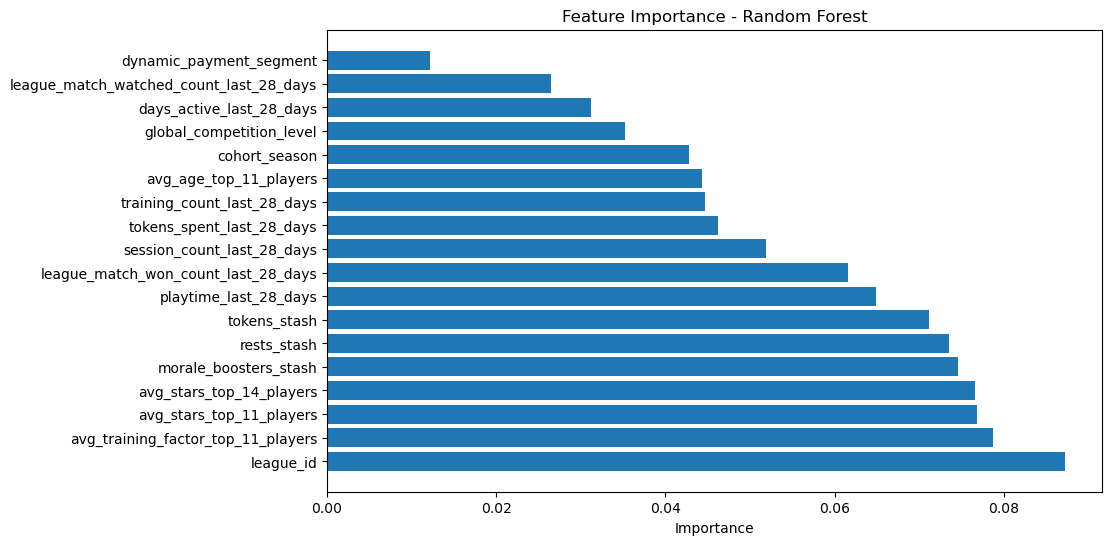

In [68]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [69]:
X.info()
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  int64  
 3   avg_age_top_11_players                   55314 non-null  int64  
 4   avg_stars_top_11_players                 55314 non-null  float64
 5   avg_stars_top_14_players                 55314 non-null  float64
 6   avg_training_factor_top_11_players       55314 non-null  float64
 7   days_active_last_28_days                 55314 non-null  int64  
 8   league_match_watched_count_last_28_days  55314 non-null  int64  
 9   session_count_last_28_days               55314 non-null  int64  
 10  playtime_last_28_days                    55314

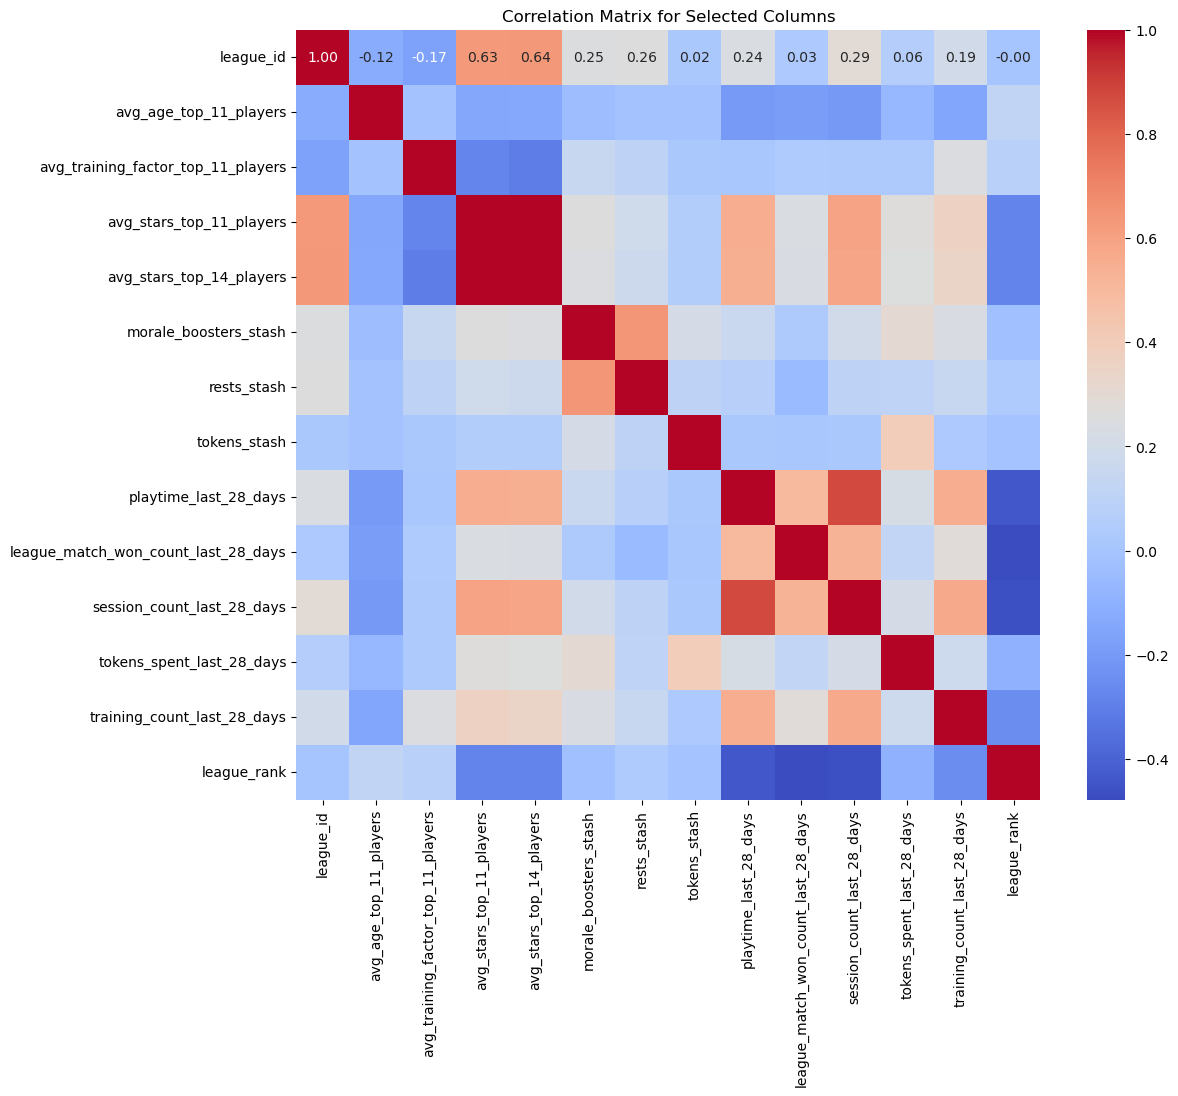

In [105]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(fajl)
X_scaled_df = pd.DataFrame(X_scaled, columns=fajl.columns)
# Selected columns
selected_columns = ["league_id","avg_age_top_11_players", "avg_training_factor_top_11_players", "avg_stars_top_11_players",
                "avg_stars_top_14_players", "morale_boosters_stash", "rests_stash", "tokens_stash",
                "playtime_last_28_days", "league_match_won_count_last_28_days",
                "session_count_last_28_days",'tokens_spent_last_28_days','training_count_last_28_days','league_rank']

# Filter the normalized data for selected columns
#X_train_selected = X_scaled[selected_columns]
X_train_selected = X_scaled_df.loc[:, selected_columns]
# Calculate the correlation matrix for selected columns
correlation_matrix_selected = X_train_selected.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Columns")
plt.show()



In [71]:
print(correlation_matrix_selected)

                                        league_id  \
league_id                            1.000000e+00   
avg_training_factor_top_11_players  -1.677249e-01   
avg_stars_top_11_players             6.286587e-01   
avg_stars_top_14_players             6.350776e-01   
morale_boosters_stash                2.509511e-01   
rests_stash                          2.641769e-01   
tokens_stash                         2.329371e-02   
playtime_last_28_days                2.399775e-01   
league_match_won_count_last_28_days  2.853280e-02   
session_count_last_28_days           2.908407e-01   
tokens_spent_last_28_days            6.014765e-02   
training_count_last_28_days          1.941494e-01   
league_rank                         -1.402732e-18   

                                     avg_training_factor_top_11_players  \
league_id                                                     -0.167725   
avg_training_factor_top_11_players                             1.000000   
avg_stars_top_11_players        

#### Drop Feature with High Correlation

In the feature analysis, it was observed that the "avg_stars_top_14_players" feature has a high correlation with the "avg_stars_top_11_players" feature. To avoid multicollinearity and improve model performance, we have decided to drop the "avg_stars_top_14_players" feature from our dataset.



#### Drop the correlated feature
X = X.drop("avg_stars_top_14_players", axis=1)

#### The "league_id" feature exhibits a weak correlation with "league_rank." However, upon closer examination of feature importance, it becomes apparent that "league_id" holds significance. There are 14 columns with the same "league_id" (for each player). While Random Forest may have detected a certain connection, for now, I will exclude this column and observe the performance of my predictions without it. This allows me to assess the impact of removing the "league_id" feature on the predictive capabilities of the model.

#### Observing a high correlation between "avg_training_factor_top_11_players" and "avg_stars_top_11_players," it seems beneficial to create a new feature by taking the product of these two variables. This composite feature aims to capture potential interactions or dependencies between the average training factor and the average stars of the top 11 players. The introduction of this new feature allows the model to leverage combined information, potentially enhancing its predictive capabilities.



# next few cells are my final decision and prediction


In [85]:
cols=["league_id", "avg_training_factor_top_11_players", "avg_stars_top_11_players",
                "avg_stars_top_14_players", "morale_boosters_stash", "rests_stash", "tokens_stash",
                "playtime_last_28_days", "league_match_won_count_last_28_days",
                "session_count_last_28_days",'tokens_spent_last_28_days','training_count_last_28_days']

X=fajl[cols]
X_test_final=fajl_test[cols]

print(X_test_final.info())
print(X.info())

X = X.drop("league_id", axis=1)
X = X.drop("avg_stars_top_14_players", axis=1)

X_test_final = X_test_final.drop("league_id", axis=1)
X_test_final = X_test_final.drop("avg_stars_top_14_players", axis=1)

X['avg_training_stars'] = X['avg_training_factor_top_11_players'] * X['avg_stars_top_11_players']
X_test_final['avg_training_stars'] = X_test_final['avg_training_factor_top_11_players'] * X_test_final['avg_stars_top_11_players']

X = X.drop("avg_training_factor_top_11_players", axis=1)
X_test_final = X_test_final.drop("avg_training_factor_top_11_players", axis=1)

X = X.drop("avg_stars_top_11_players", axis=1)
X_test_final = X_test_final.drop("avg_stars_top_11_players", axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   league_id                            60270 non-null  int64  
 1   avg_training_factor_top_11_players   60270 non-null  float64
 2   avg_stars_top_11_players             60270 non-null  float64
 3   avg_stars_top_14_players             60270 non-null  float64
 4   morale_boosters_stash                60270 non-null  int64  
 5   rests_stash                          60270 non-null  int64  
 6   tokens_stash                         60270 non-null  int64  
 7   playtime_last_28_days                60270 non-null  int64  
 8   league_match_won_count_last_28_days  60270 non-null  int64  
 9   session_count_last_28_days           60270 non-null  int64  
 10  tokens_spent_last_28_days            60270 non-null  int64  
 11  training_count_last_28_days 

In [86]:
print(X_test_final.info())
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   morale_boosters_stash                60270 non-null  int64  
 1   rests_stash                          60270 non-null  int64  
 2   tokens_stash                         60270 non-null  int64  
 3   playtime_last_28_days                60270 non-null  int64  
 4   league_match_won_count_last_28_days  60270 non-null  int64  
 5   session_count_last_28_days           60270 non-null  int64  
 6   tokens_spent_last_28_days            60270 non-null  int64  
 7   training_count_last_28_days          60270 non-null  int64  
 8   avg_training_stars                   60270 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 4.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 9 columns):
 # 

### Feature Engineering Decision

After analyzing the data, I've decided to focus on the feature "league_match_won_count_last_28_days" as it represents the number of league matches won in the last 28 days. This feature is not only highly correlated with the target variable (league_rank) but also provides valuable information about the player's recent performance in league matches.

To simplify and avoid potential multicollinearity issues, I have chosen to drop the features "playtime_last_28_days" and "session_count_last_28_days," which were found to be highly correlated with "league_match_won_count_last_28_days."

Also i will drop token stash and morale stash


In [87]:
X = X.drop(['session_count_last_28_days'], axis=1)
X = X.drop(['morale_boosters_stash'], axis=1)
X_test_final = X_test_final.drop(['session_count_last_28_days'], axis=1)
X_test_final = X_test_final.drop(['morale_boosters_stash'], axis=1)


In [88]:
print(X_test_final.info())
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   rests_stash                          60270 non-null  int64  
 1   tokens_stash                         60270 non-null  int64  
 2   playtime_last_28_days                60270 non-null  int64  
 3   league_match_won_count_last_28_days  60270 non-null  int64  
 4   tokens_spent_last_28_days            60270 non-null  int64  
 5   training_count_last_28_days          60270 non-null  int64  
 6   avg_training_stars                   60270 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 3.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0 

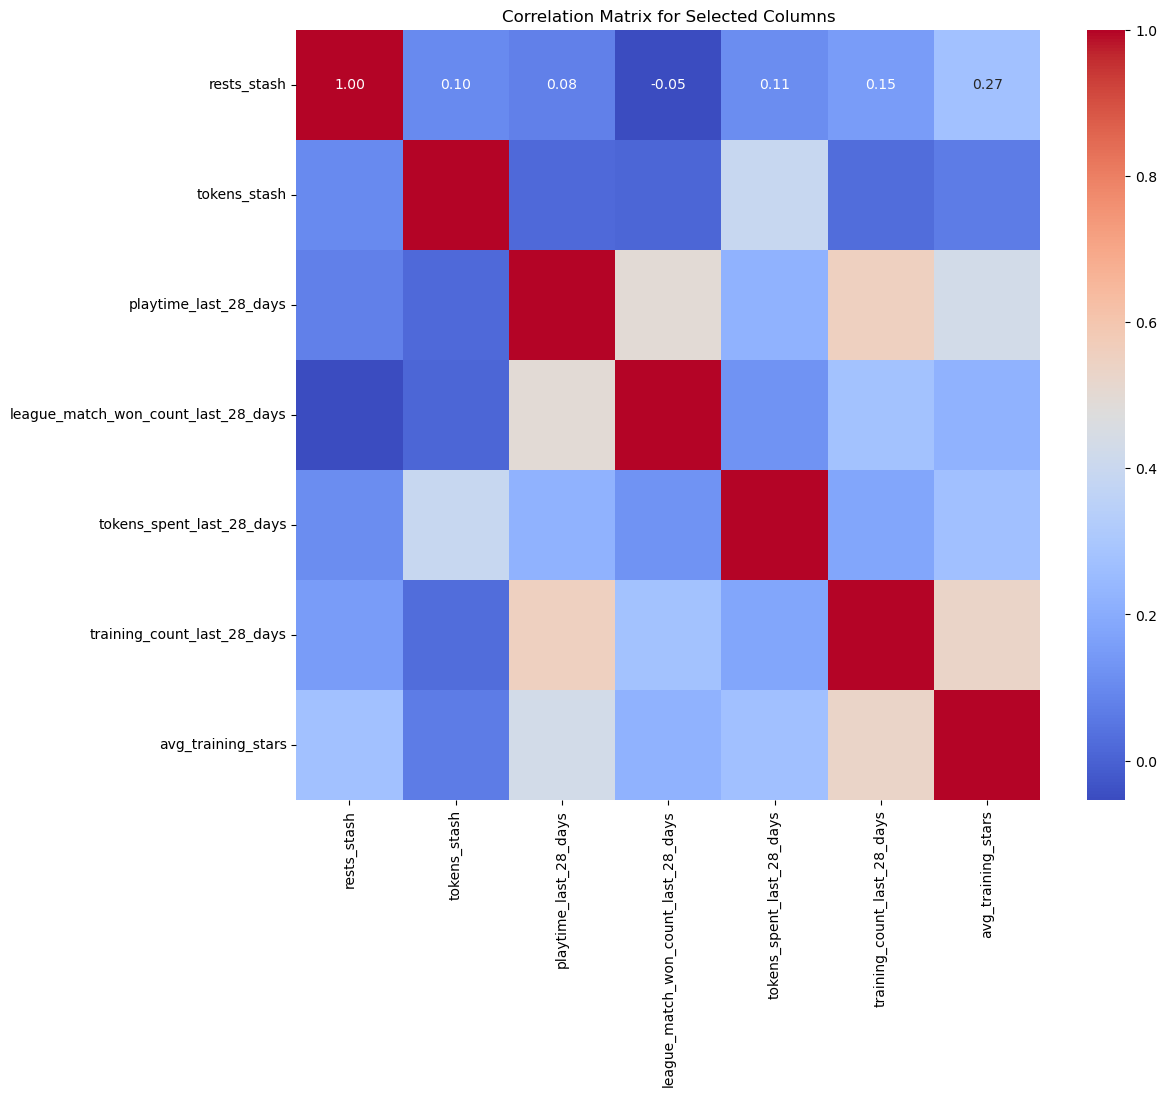

                                     rests_stash  tokens_stash  \
rests_stash                             1.000000      0.100059   
tokens_stash                            0.100059      1.000000   
playtime_last_28_days                   0.075600      0.019709   
league_match_won_count_last_28_days    -0.053441      0.011187   
tokens_spent_last_28_days               0.110718      0.394808   
training_count_last_28_days             0.148709      0.028042   
avg_training_stars                      0.272707      0.065889   

                                     playtime_last_28_days  \
rests_stash                                       0.075600   
tokens_stash                                      0.019709   
playtime_last_28_days                             1.000000   
league_match_won_count_last_28_days               0.495504   
tokens_spent_last_28_days                         0.222234   
training_count_last_28_days                       0.554662   
avg_training_stars                   

In [89]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Calculate the correlation matrix for selected columns
correlation_matrix_selected = X_scaled_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Columns")
plt.show()

print(correlation_matrix_selected)


In [90]:
print(X.info())
print(X_test_final.info())

y = fajl['league_rank']
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   rests_stash                          55314 non-null  int64  
 1   tokens_stash                         55314 non-null  int64  
 2   playtime_last_28_days                55314 non-null  int64  
 3   league_match_won_count_last_28_days  55314 non-null  int64  
 4   tokens_spent_last_28_days            55314 non-null  int64  
 5   training_count_last_28_days          55314 non-null  int64  
 6   avg_training_stars                   55314 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 3.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0 

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Assuming X is your feature set and y is your target variable
# X.shape should be (55314, num_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

rf_classifier = RandomForestClassifier(
    n_estimators=10,          # Number of trees in the forest
    max_depth=15,               # Maximum depth of the trees
    min_samples_split=50,        # Minimum number of samples required to split an internal node
    min_samples_leaf=50,         # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Compute training Mean Absolute Error
train_mae = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Absolute Error: {train_mae}')

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Compute validation Mean Absolute Error
val_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Validation Mean Absolute Error: {val_mae}')


Training Mean Absolute Error: 2.8063294511684553
Validation Mean Absolute Error: 3.031453362255965


In [166]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   rests_stash                          60270 non-null  int64  
 1   tokens_stash                         60270 non-null  int64  
 2   playtime_last_28_days                60270 non-null  int64  
 3   league_match_won_count_last_28_days  60270 non-null  int64  
 4   tokens_spent_last_28_days            60270 non-null  int64  
 5   training_count_last_28_days          60270 non-null  int64  
 6   avg_training_stars                   60270 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 3.2 MB


In [168]:
X_test_final_scaled=scaler.fit_transform(X_test_final)

y_final = rf_classifier.predict(X_test_final_scaled)
predictions_df = pd.DataFrame({'Predictions': y_final})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions1.csv', index=False)

In [205]:
fajl_sub=pd.read_csv("league_rank_predictions.csv")
fajl_test_final=pd.read_csv('jobfair_test.csv')
fajl_test_final=fajl_test_final['club_id']
print(fajl_test_final)

concatenated_df = pd.concat([fajl_test_final, fajl_sub], axis=1)

# Save the concatenated DataFrame to predictions1.csv
concatenated_df.to_csv('predictions1.csv', index=False)


0        14542747
1        11019672
2        14358567
3        14644461
4        13718978
           ...   
60265    14614619
60266    13805591
60267    14559860
60268    14671631
60269     6034856
Name: club_id, Length: 60270, dtype: int64


,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,174,14542747,2951383,0) NonPayer,1,23,4.295345,4.100333,0.469406,8,...,France,iOS Phone,10,6,NaN,82,18,177,106,8.0
1,174,11019672,2954266,0) NonPayer,21,24,4.704727,4.484933,0.317702,28,...,Indonesia,Android Phone,16,26,7.0,153,65,1030,717,5.0
2,174,14358567,2951259,0) NonPayer,2,22,2.923867,2.819171,0.669540,0,...,Brazil,Android Phone,7,0,NaN,0,138,156,98,14.0
3,174,14644461,2949546,0) NonPayer,1,22,3.114776,2.977457,0.639923,3,...,Spain,Android Phone,2,1,NaN,2,43,43,25,3.0
4,174,13718978,2952772,0) NonPayer,6,23,4.194497,4.114257,0.486229,26,...,France,Android Phone,22,46,1.0,100,30,45,53,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60265,174,14614619,2950335,3) Dolphin,1,22,5.717321,5.430162,0.455917,28,...,Germany,iOS Phone,25,183,5.0,346,50,25,170,14.0
60266,174,13805591,2955052,0) NonPayer,5,21,4.079200,3.851924,0.645815,1,...,Indonesia,Android Phone,12,1,2.0,0,12,188,148,5.0
60267,174,14559860,2953561,0) NonPayer,1,23,4.839515,4.643467,0.459347,20,...,Brazil,Android Tablet,16,40,2.0,145,3,9,173,4.0
60268,174,14671631,2950158,0) NonPayer,1,26,4.882400,4.596143,0.402482,8,...,Vietnam,WebGL TE Site,6,69,2.0,109,2,57,84,4.0


In [63]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam

# Assuming X is your feature set and y is your target variable
# X.shape should be (55314, num_features)

#X=X.drop(['rests_stash','tokens_stash','session_count_last_28_days'],axis=1)
#X_test_final=X_test_final.drop(['rests_stash','tokens_stash','session_count_last_28_days'],axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
y_train -= 1
y_val -= 1
num_features=7

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    #tf.keras.layers.Dense(1024, activation='relu'),
    #tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')  # Assuming 14 classes
])

learning_rate = 0.05
# Compile the model
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
1643/1643 [==============================] - 4s 2ms/step - loss: 2.4773 - mae: 6.4398 - val_loss: 2.4619 - val_mae: 6.4191
Epoch 2/10
1643/1643 [==============================] - 3s 2ms/step - loss: 2.4612 - mae: 6.4398 - val_loss: 2.4475 - val_mae: 6.4191
Epoch 3/10
1643/1643 [==============================] - 3s 2ms/step - loss: 2.4573 - mae: 6.4398 - val_loss: 2.4680 - val_mae: 6.4191
Epoch 4/10
1643/1643 [==============================] - 3s 2ms/step - loss: 2.4668 - mae: 6.4398 - val_loss: 2.4713 - val_mae: 6.4191
Epoch 5/10
1643/1643 [==============================] - 3s 2ms/step - loss: 2.4625 - mae: 6.4398 - val_loss: 2.4684 - val_mae: 6.4191
Epoch 6/10
1643/1643 [==============================] - 4s 2ms/step - loss: 2.4656 - mae: 6.4398 - val_loss: 2.4711 - val_mae: 6.4191
Epoch 7/10
1643/1643 [==============================] - 4s 2ms/step - loss: 2.4651 - mae: 6.4398 - val_loss: 2.4705 - val_mae: 6.4191
Epoch 8/10
1643/1643 [==============================] - 4s 2ms

In [64]:
y_train_pred = model.predict(X_train)
y_train_pred_classes = tf.argmax(y_train_pred,axis=1)
mae = mean_absolute_error(y_train,y_train_pred_classes.numpy())
print(f'Test Mean Absolute Error: {mae}')
#Evaluate the model on the test set
y_val_pred = model.predict(X_val)
y_val_pred_classes = tf.argmax(y_val_pred, axis=1)
mae = mean_absolute_error(y_val, y_val_pred_classes.numpy())
print(f'Test Mean Absolute Error: {mae}')

1643/1643 [==============================] - 1s 863us/step
Test Mean Absolute Error: 3.9733957524548984
87/87 [==============================] - 0s 1ms/step
Test Mean Absolute Error: 3.992046276211135


In [ ]:
import matplotlib.pyplot as plt

# Train the model and get the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_val, y_val))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [132]:
X_scaled_final = scaler.fit_transform(X_test_final)

y_test_final_pred = rf_classifier.predict(X_scaled_final)
predictions_df = pd.DataFrame({'Predictions': y_test_final_pred})
predictions_df.to_csv('predictions.csv', index=False)

In [66]:
X1=fajl['league_match_won_count_last_28_days']
X1_test_final=fajl_test['league_match_won_count_last_28_days']

In [79]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam

# Assuming X1 is your feature set and y is your target variable
# X1.shape should be (55314,)

# Reshape X1 to a 2D array
X1 = X1.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

# Create a simple linear regression model with 14 outputs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation='softmax', input_shape=(1,))
])

learning_rate = 0.001
# Compile the model
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_val, y_val))


Epoch 1/100
13137/13137 [==============================] - 15s 1ms/step - loss: 71.4503 - mae: 7.4302 - val_loss: 71.1436 - val_mae: 7.4090
Epoch 2/100
 7527/13137 [================>.............] - ETA: 7s - loss: 71.3544 - mae: 7.4252

KeyboardInterrupt: 

In [76]:
y_train_pred = model.predict(X_train)
y_train_pred_classes = tf.argmax(y_train_pred,axis=1)
mae = mean_absolute_error(y_train,y_train_pred_classes.numpy())
print(f'Test Mean Absolute Error: {mae}')
#Evaluate the model on the test set
y_val_pred = model.predict(X_val)
y_val_pred_classes = tf.argmax(y_val_pred, axis=1)
mae = mean_absolute_error(y_val, y_val_pred_classes.numpy())
print(f'Test Mean Absolute Error: {mae}')

1643/1643 [==============================] - 1s 321us/step
Test Mean Absolute Error: 7.501027631879425
87/87 [==============================] - 0s 337us/step
Test Mean Absolute Error: 7.480477223427332


In [90]:
# Create a new feature as the product of "avg_stars_top_11_players" and "avg_training_factor_top_11_players"
X_train_selected['stars_product_factor'] = X_train_selected['avg_stars_top_11_players'] * X_train_selected['avg_training_factor_top_11_players']

# Drop the original columns
X_train_selected = X_train_selected.drop(['avg_stars_top_11_players', 'avg_training_factor_top_11_players','avg_stars_top_14_players'], axis=1)



In [92]:
X_train_selected['playtime_plus_session'] = X_train_selected['playtime_last_28_days'] + X_train_selected['session_count_last_28_days']

X_train_selected = X_train_selected.drop(['playtime_last_28_days','session_count_last_28_days'], axis=1)





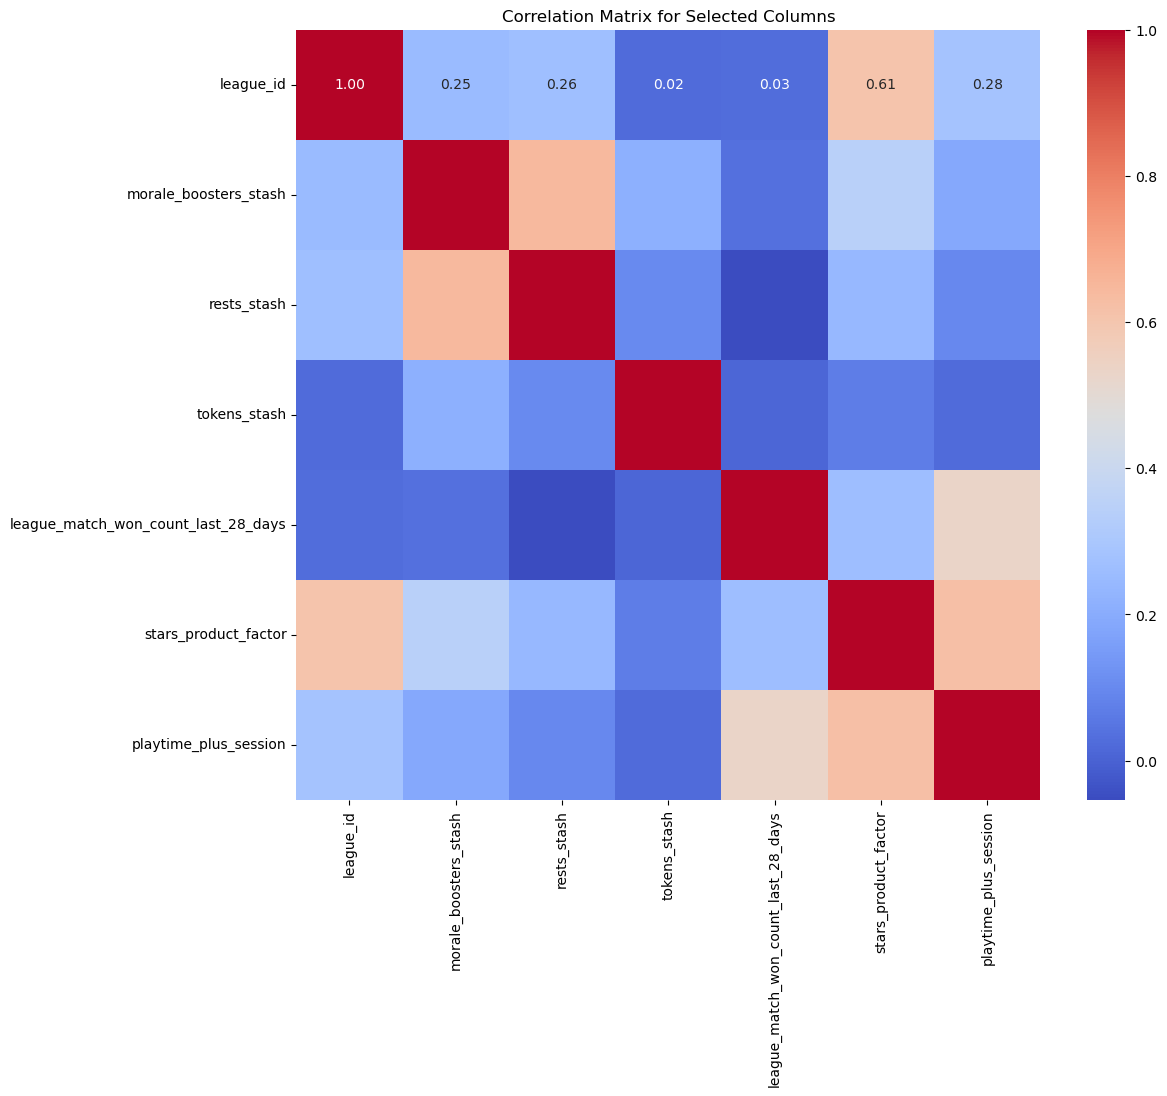

In [93]:
correlation_matrix_selected = X_train_selected.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Columns")
plt.show()

In [95]:
(correlation_matrix_selected)
print(X_train_selected)

       league_id  morale_boosters_stash  rests_stash  tokens_stash  \
0       0.927778               0.024964     0.010778      0.006968   
1       0.902403               0.000732     0.006194      0.006641   
2       0.999146               0.150548     0.018612      0.007133   
3       0.686593               0.003845     0.011598      0.006698   
4       0.352446               0.004486     0.008167      0.006662   
...          ...                    ...          ...           ...   
55309   0.216055               0.001129     0.005890      0.006654   
55310   0.264731               0.007813     0.016001      0.006852   
55311   0.151519               0.001740     0.007256      0.006655   
55312   0.694644               0.004578     0.008441      0.006727   
55313   0.687813               0.010804     0.005647      0.006673   

       league_match_won_count_last_28_days  stars_product_factor  \
0                                 0.923077              0.081191   
1                      

In [98]:
print(X_train_selected.shape)
print(y_train_encoded.shape)

(55314, 7)
(55314, 14)


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Split the data into training and validation sets
X_training, X_validation, y_train, y_validation = train_test_split(X_train_selected, y_train_encoded, test_size=0.1, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_training, y_train)

# Make predictions on the validation set
predictions_validation = rf_classifier.predict(X_validation)
predictions_validation = np.argmax(predictions_validation, axis=1) + 1

# Calculate mean absolute error on the validation set
mae_validation = mean_absolute_error(y_validation, predictions_validation)

# Print the mean absolute error
print(f"Mean Absolute Error on Validation Set: {mae_validation}")


ValueError: y_true and y_pred have different number of output (14!=1)

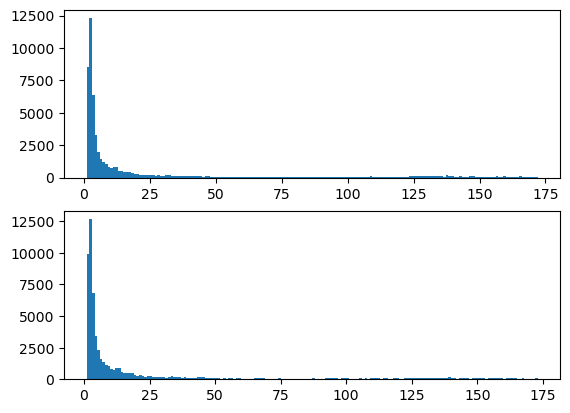

In [11]:

plt.subplot(2,1,1)
plt.hist(fajl['cohort_season'],bins=172)
plt.subplot(2,1,2)
plt.hist(fajl_test['cohort_season'],bins=172)
plt.show()

In [12]:
# cohort season is needed for the analysis
# similar distribution in train and test


def min_max_scaler(df, column):

    min_value = df[column].min()
    max_value = df[column].max()

    df[column] = (df[column] - min_value) / (max_value - min_value)
    return df

fajl = min_max_scaler(fajl, 'cohort_season')
fajl_test = min_max_scaler(fajl_test, 'cohort_season')

In [13]:
fajl['cohort_season']

0        0.777778
1        0.157895
2        0.789474
3        0.005848
4        0.023392
           ...   
55309    0.005848
55310    0.005848
55311    0.000000
55312    0.023392
55313    0.087719
Name: cohort_season, Length: 55314, dtype: float64

In [14]:
# ALL VALUES ARE THERE - NO MISSING VALUES - NO NEED TO FILL IN MISSING VALUES WITH MEAN/MEDIAN/MODE ETC. 
fajl_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                60270 non-null  int64  
 1   dynamic_payment_segment                  60270 non-null  int64  
 2   cohort_season                            60270 non-null  float64
 3   avg_age_top_11_players                   60270 non-null  int64  
 4   avg_stars_top_11_players                 60270 non-null  float64
 5   avg_stars_top_14_players                 60270 non-null  float64
 6   avg_training_factor_top_11_players       60270 non-null  float64
 7   days_active_last_28_days                 60270 non-null  int64  
 8   league_match_watched_count_last_28_days  60270 non-null  int64  
 9   session_count_last_28_days               60270 non-null  int64  
 10  playtime_last_28_days                    60270

In [15]:
fajl['avg_age_top_11_players'].value_counts()

avg_age_top_11_players
23    11528
24    10856
22     9102
25     7455
21     5023
26     4028
27     2091
20     1851
28     1079
29      627
30      546
31      348
19      345
32      254
33      165
18       16
Name: count, dtype: int64

In [16]:
fajl_test['avg_age_top_11_players'].value_counts()

avg_age_top_11_players
23    12838
24    11813
22    10191
25     8112
21     5521
26     4444
27     2256
20     2023
28     1196
29      638
30      462
19      360
31      214
32      122
33       73
18        7
Name: count, dtype: int64

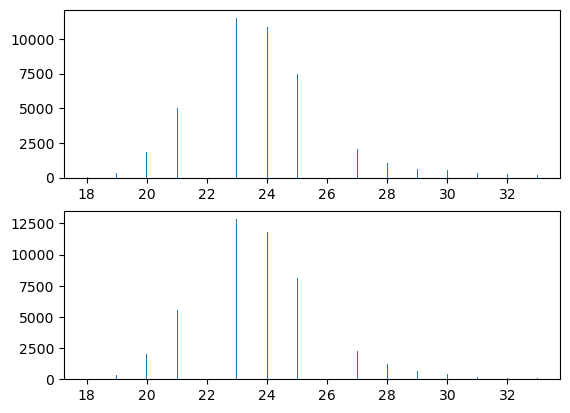

In [17]:
num_bins_train = int(np.sqrt(len(fajl['avg_age_top_11_players'])))
num_bins_test = int(np.sqrt(len(fajl_test['avg_age_top_11_players'])))

plt.subplot(2,1,1)
plt.hist(fajl['avg_age_top_11_players'],bins=500)
plt.subplot(2,1,2)
plt.hist(fajl_test['avg_age_top_11_players'],bins=500)
plt.show()

In [18]:
# pretty much the same distribution in train and test for the avg_age_top_11_players

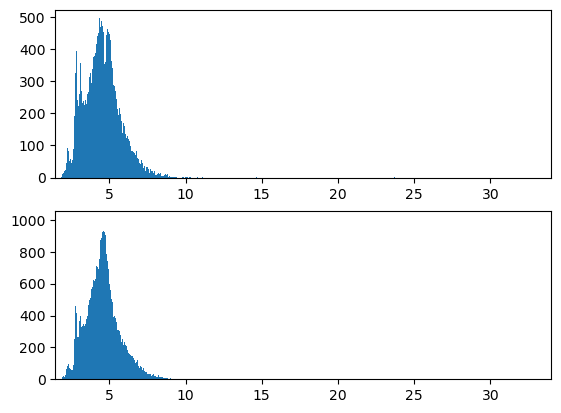

In [19]:
num_bins_train = int(np.sqrt(len(fajl['avg_stars_top_11_players'])))
num_bins_test = int(np.sqrt(len(fajl_test['avg_stars_top_11_players'])))

x_range = (min(fajl['avg_stars_top_11_players'].min(), fajl_test['avg_stars_top_11_players'].min()),
           max(fajl['avg_stars_top_11_players'].max(), fajl_test['avg_stars_top_11_players'].max()))


plt.subplot(2,1,1)
plt.hist(fajl['avg_stars_top_11_players'],bins=1000)
plt.xlim(x_range)

plt.subplot(2,1,2)
plt.hist(fajl_test['avg_stars_top_11_players'],bins=1000)
plt.xlim(x_range)
plt.show()

In [20]:
fajl['avg_stars_top_11_players']

0         5.255151
1         4.962521
2        11.105782
3         4.164848
4         3.031939
           ...    
55309     4.160909
55310     4.244145
55311     4.000158
55312     4.582158
55313     5.176582
Name: avg_stars_top_11_players, Length: 55314, dtype: float64

In [21]:
# Assuming your DataFrame is named 'fajl'
correlation_matrix = fajl[['avg_age_top_11_players', 'avg_stars_top_11_players']].corr()

print(correlation_matrix)

#

                          avg_age_top_11_players  avg_stars_top_11_players
avg_age_top_11_players                  1.000000                 -0.147161
avg_stars_top_11_players               -0.147161                  1.000000


In [22]:
# 3 options
# 1 avg_age_top_11_players normalizes the data and avg_stars_top_11_players normalizes the data
# fajl['age_experience_interaction'] = fajl['avg_age_top_11_players'] * fajl['avg_stars_top_11_players']
# fajl['age_experience_ratio'] = fajl['avg_age_top_11_players'] / fajl['avg_stars_top_11_players']


In [23]:
# first normalize function for the avg_age_top_11_players and avg_stars_top_11_players - min max scaler - same as with cohort_season
# they are not so much in correlation 

fajl = min_max_scaler(fajl, 'avg_age_top_11_players')
fajl_test = min_max_scaler(fajl_test, 'avg_age_top_11_players')

fajl = min_max_scaler(fajl, 'avg_stars_top_11_players')
fajl_test = min_max_scaler(fajl_test, 'avg_stars_top_11_players')

In [ ]:
# fajl['age_experience_interaction'] = fajl['avg_age_top_11_players'] * fajl['avg_stars_top_11_players']

def age_experience_interaction(df, column1, column2):
    
        df['age_experience_interaction'] = df[column1] * df[column2]
        return df

fajl = age_experience_interaction(fajl, 'avg_age_top_11_players', 'avg_stars_top_11_players')
fajl_test = age_experience_interaction(fajl_test, 'avg_age_top_11_players', 'avg_stars_top_11_players')

fajl.drop(['avg_age_top_11_players', 'avg_stars_top_11_players'], axis=1, inplace=True)
fajl_test.drop(['avg_age_top_11_players', 'avg_stars_top_11_players'], axis=1, inplace=True)
 

In [50]:
# fajl['age_experience_ratio'] = fajl['avg_age_top_11_players'] / fajl['avg_stars_top_11_players']

def age_experience_ratio(df, column1, column2):
    
        df['age_experience_ratio'] = df[column1] / df[column2]
        return df

fajl = age_experience_ratio(fajl, 'avg_age_top_11_players', 'avg_stars_top_11_players')
fajl_test = age_experience_ratio(fajl_test, 'avg_age_top_11_players', 'avg_stars_top_11_players')

fajl.drop(['avg_age_top_11_players', 'avg_stars_top_11_players'], axis=1, inplace=True)
fajl_test.drop(['avg_age_top_11_players', 'avg_stars_top_11_players'], axis=1, inplace=True)


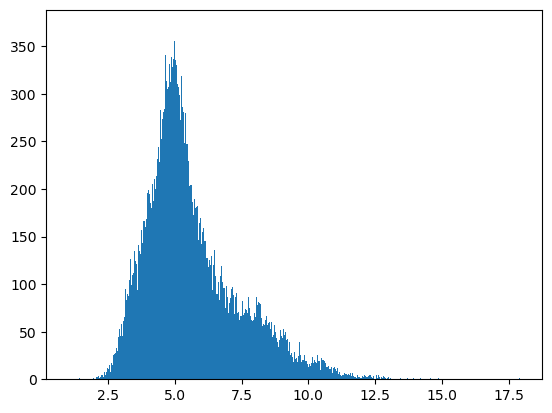

In [56]:


plt.figure()
plt.hist(fajl[" # METHOD "], bins=1000) # METHOD IS age_experience_interaction or age_experience_ratio ( 2 options - look at the previous 2 cells )
plt.show()

In [ ]:
# normalization of the age_experience_ratio - -mean/std

def standardization(df, column):
        
        mean_value = df[column].mean()
        std_value = df[column].std()
        
        df[column] = (df[column] - mean_value) / std_value
        return df

fajl = standardization(fajl, 'age_experience_ratio')
fajl_test = standardization(fajl_test, 'age_experience_ratio')





In [ ]:
plt.figure()
plt.hist(fajl['age_experience_ratio'], bins=1000)
plt.show()

In [25]:
fajl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  float64
 3   avg_age_top_11_players                   55314 non-null  float64
 4   avg_stars_top_11_players                 55314 non-null  float64
 5   avg_stars_top_14_players                 55314 non-null  float64
 6   avg_training_factor_top_11_players       55314 non-null  float64
 7   days_active_last_28_days                 55314 non-null  int64  
 8   league_match_watched_count_last_28_days  55314 non-null  int64  
 9   session_count_last_28_days               55314 non-null  int64  
 10  playtime_last_28_days                    55314

In [26]:
fajl['avg_training_factor_top_11_players'].value_counts()

avg_training_factor_top_11_players
1.778801    1
0.426981    1
0.522362    1
0.760215    1
0.514818    1
           ..
0.608878    1
0.445980    1
0.473320    1
0.592407    1
0.640298    1
Name: count, Length: 55314, dtype: int64

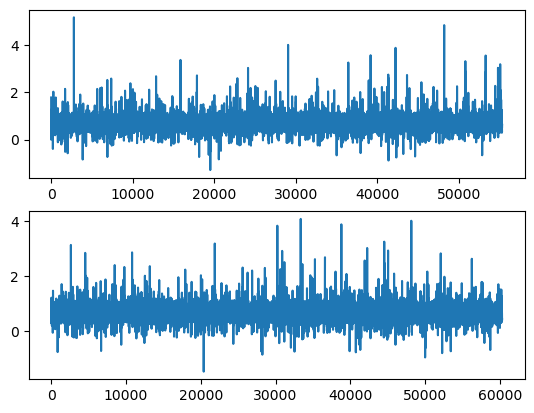

In [27]:
plt.subplot(2,1,1)
plt.plot(fajl['avg_training_factor_top_11_players'])
plt.subplot(2,1,2)
plt.plot(fajl_test['avg_training_factor_top_11_players'])
plt.show()

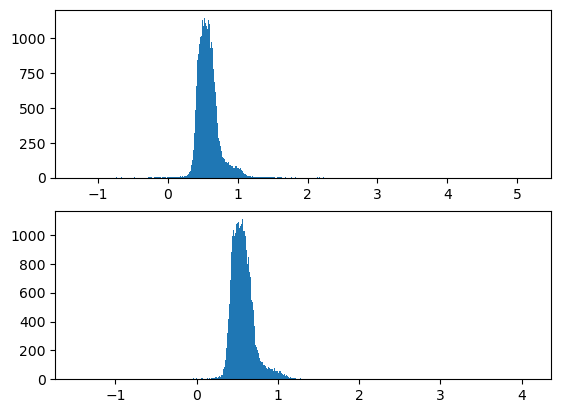

In [28]:
plt.subplot(2,1,1)
plt.hist(fajl['avg_training_factor_top_11_players'],bins= 1000)
plt.subplot(2,1,2)
plt.hist(fajl_test['avg_training_factor_top_11_players'] ,bins= 1000)
plt.show()

In [29]:

# with assumption that the avg_training_factor_top_11_players has outliers - change values greater than 2.0 to 2.0

import numpy as np

# Change values greater than 2.0 to 2.0 in 'avg_training_factor_top_11_players'
fajl['avg_training_factor_top_11_players'] = np.where(fajl['avg_training_factor_top_11_players'] > 2.0, 2.0, fajl['avg_training_factor_top_11_players'])
fajl_test['avg_training_factor_top_11_players'] = np.where(fajl_test['avg_training_factor_top_11_players'] > 2.0, 2.0, fajl_test['avg_training_factor_top_11_players'])


In [30]:
fajl['avg_training_factor_top_11_players'].describe()

count    55314.000000
mean         0.583735
std          0.170476
min         -1.287736
25%          0.479571
50%          0.561158
75%          0.648180
max          2.000000
Name: avg_training_factor_top_11_players, dtype: float64

In [31]:
fajl_test['avg_training_factor_top_11_players'].describe()

count    60270.000000
mean         0.573170
std          0.162073
min         -1.462095
25%          0.473739
50%          0.552765
75%          0.639126
max          2.000000
Name: avg_training_factor_top_11_players, dtype: float64

In [32]:
fajl=min_max_scaler(fajl, 'avg_training_factor_top_11_players')
fajl_test= min_max_scaler(fajl_test, 'avg_training_factor_top_11_players')


In [33]:
# correlation between the avg_stars_top_14_players and the avg_stars_top_11_players - 0.99 - drop one of them

fajl1=pd.read_csv('jobfair_train.csv')
import pandas as pd

# Assuming your DataFrame is named 'fajl'
correlation_matrix = fajl1[['avg_stars_top_11_players', 'avg_stars_top_14_players']].corr()

print(correlation_matrix)




                          avg_stars_top_11_players  avg_stars_top_14_players
avg_stars_top_11_players                  1.000000                  0.996793
avg_stars_top_14_players                  0.996793                  1.000000


In [34]:
fajl.drop(['avg_stars_top_14_players'], axis=1, inplace=True)
fajl_test.drop(['avg_stars_top_14_players'], axis=1, inplace=True)

In [35]:
fajl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  float64
 3   avg_age_top_11_players                   55314 non-null  float64
 4   avg_stars_top_11_players                 55314 non-null  float64
 5   avg_training_factor_top_11_players       55314 non-null  float64
 6   days_active_last_28_days                 55314 non-null  int64  
 7   league_match_watched_count_last_28_days  55314 non-null  int64  
 8   session_count_last_28_days               55314 non-null  int64  
 9   playtime_last_28_days                    55314 non-null  int64  
 10  registration_country                     55314

In [36]:
fajl['days_active_last_28_days'].value_counts()

days_active_last_28_days
0     13005
28    11952
1      5064
2      2961
27     2603
3      1993
26     1551
4      1529
5      1224
25     1157
6      1017
24      877
7       872
8       790
23      770
9       732
22      656
10      628
21      625
20      566
11      562
18      550
19      547
12      546
17      521
13      512
16      507
14      505
15      492
Name: count, dtype: int64

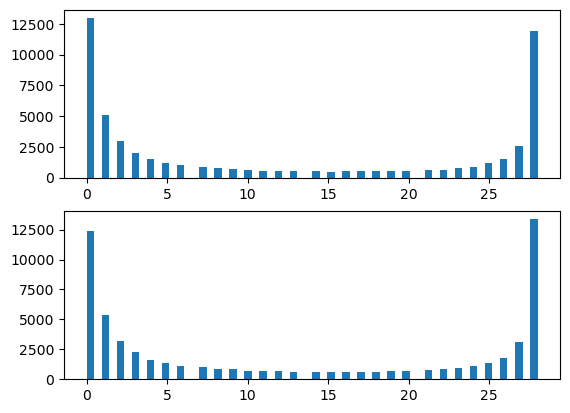

In [37]:
plt.subplot(2,1,1)
plt.hist(fajl['days_active_last_28_days'],bins=60)
plt.subplot(2,1,2)
plt.hist(fajl_test['days_active_last_28_days'],bins=60)
plt.show()


In [38]:
correlation_matrix = fajl[['days_active_last_28_days', 'league_rank']].corr()

print(correlation_matrix)

                          days_active_last_28_days  league_rank
days_active_last_28_days                   1.00000     -0.53058
league_rank                               -0.53058      1.00000


In [39]:
fajl=min_max_scaler(fajl, 'days_active_last_28_days')
fajl_test=min_max_scaler(fajl_test, 'days_active_last_28_days')

In [40]:
correlation_matrix = fajl[['league_match_watched_count_last_28_days', 'league_rank']].corr()

print(correlation_matrix)

                                         league_match_watched_count_last_28_days  \
league_match_watched_count_last_28_days                                 1.000000   
league_rank                                                            -0.459192   

                                         league_rank  
league_match_watched_count_last_28_days    -0.459192  
league_rank                                 1.000000  


In [41]:
fajl['league_match_watched_count_last_28_days'].value_counts()

league_match_watched_count_last_28_days
0     29504
1      4759
2      2790
3      2007
4      1642
5      1390
6      1287
7      1087
8      1046
9       983
10      889
12      880
11      828
13      732
14      725
15      663
16      652
17      575
18      566
19      497
20      434
21      389
22      299
23      271
24      218
25      137
26       64
Name: count, dtype: int64

In [42]:
fajl = min_max_scaler(fajl, 'league_match_watched_count_last_28_days')
fajl_test = min_max_scaler(fajl_test, 'league_match_watched_count_last_28_days')

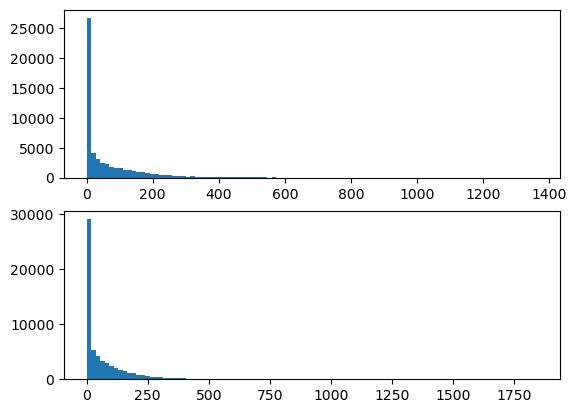

In [43]:
fajl['session_count_last_28_days'].value_counts()
plt.subplot(2,1,1)
plt.hist(fajl['session_count_last_28_days'],bins=100)
plt.subplot(2,1,2)
plt.hist(fajl_test['session_count_last_28_days'],bins=100)
plt.show()


In [44]:
fajl = min_max_scaler(fajl, 'session_count_last_28_days')
fajl_test = min_max_scaler(fajl_test, 'session_count_last_28_days')

In [45]:
fajl['playtime_last_28_days'].value_counts()

playtime_last_28_days
0           13029
104338          2
1158639         2
6833560         2
7829149         2
            ...  
5132463         1
18626500        1
97513458        1
2261548         1
604376          1
Name: count, Length: 42244, dtype: int64

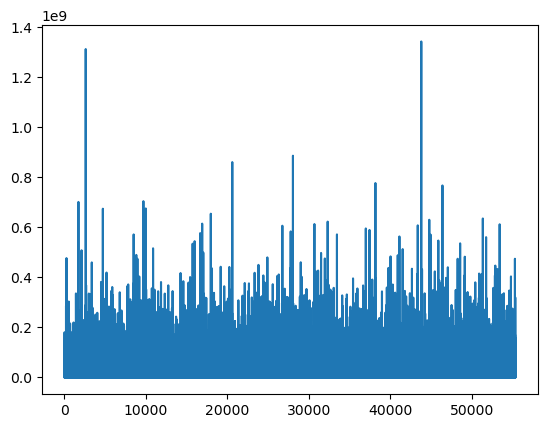

In [46]:
plt.figure()
plt.plot(fajl['playtime_last_28_days'])
plt.show()


In [47]:
fajl = standardization(fajl,'playtime_last_28_days')
fajl_test = standardization(fajl_test,'playtime_last_28_days')


In [48]:
fajl['playtime_last_28_days'].describe()

count    5.531400e+04
mean    -4.425317e-17
std      1.000000e+00
min     -5.646234e-01
25%     -5.632164e-01
50%     -4.455833e-01
75%      1.554356e-01
max      2.504689e+01
Name: playtime_last_28_days, dtype: float64

In [49]:
fajl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  float64
 3   avg_age_top_11_players                   55314 non-null  float64
 4   avg_stars_top_11_players                 55314 non-null  float64
 5   avg_training_factor_top_11_players       55314 non-null  float64
 6   days_active_last_28_days                 55314 non-null  float64
 7   league_match_watched_count_last_28_days  55314 non-null  float64
 8   session_count_last_28_days               55314 non-null  float64
 9   playtime_last_28_days                    55314 non-null  float64
 10  registration_country                     55314

In [50]:
fajl['registration_country'].value_counts()

registration_country
Indonesia    9830
Turkey       4563
Brazil       3080
Germany      2722
France       2144
             ... 
Lesotho         1
Bahamas         1
Greenland       1
Anguilla        1
Gambia          1
Name: count, Length: 186, dtype: int64

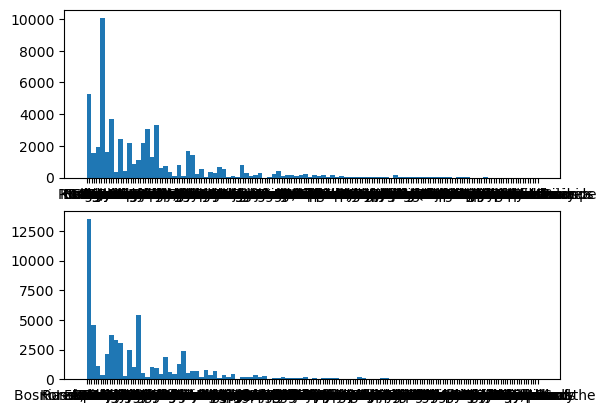

In [51]:
plt.subplot(2,1,1)
plt.hist(fajl['registration_country'],bins=100)
plt.subplot(2,1,2)
plt.hist(fajl_test['registration_country'],bins=100)
plt.show()


In [52]:

fajl['registration_country'] = le.fit_transform(fajl['registration_country'])

In [53]:
correlation = fajl[['registration_country', 'league_rank']].corr()

print(correlation)

                      registration_country  league_rank
registration_country              1.000000    -0.012674
league_rank                      -0.012674     1.000000


In [54]:
# i would say that the registration_country is not needed for the analysis - drop it
fajl.drop(['registration_country'], axis=1, inplace=True)
fajl_test.drop(['registration_country'], axis=1, inplace=True)

In [55]:
fajl['registration_platform_specific'].value_counts()

registration_platform_specific
Android Phone               35859
iOS Phone                    9896
Flash FB Canvas              4340
Android Tablet               1867
iOS Tablet                   1214
UniversalWindows PC           724
WebGL FB Canvas               702
WebGL TE Site                 489
WebGL or Flash FB Canvas      129
Flash TE Site                  77
WebGL or Flash TE Site         17
Name: count, dtype: int64

In [56]:
fajl['registration_platform_specific'] = le.fit_transform(fajl['registration_platform_specific'])

correlation = fajl[['registration_platform_specific', 'league_rank']].corr()

print(correlation)

                                registration_platform_specific  league_rank
registration_platform_specific                        1.000000     0.006854
league_rank                                           0.006854     1.000000


In [57]:
# same as with registration_country - drop it
fajl.drop(['registration_platform_specific'], axis=1, inplace=True)
fajl_test.drop(['registration_platform_specific'], axis=1, inplace=True)

In [58]:
fajl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league_id                                55314 non-null  int64  
 1   dynamic_payment_segment                  55314 non-null  int64  
 2   cohort_season                            55314 non-null  float64
 3   avg_age_top_11_players                   55314 non-null  float64
 4   avg_stars_top_11_players                 55314 non-null  float64
 5   avg_training_factor_top_11_players       55314 non-null  float64
 6   days_active_last_28_days                 55314 non-null  float64
 7   league_match_watched_count_last_28_days  55314 non-null  float64
 8   session_count_last_28_days               55314 non-null  float64
 9   playtime_last_28_days                    55314 non-null  float64
 10  league_match_won_count_last_28_days      55314

In [59]:
fajl['league_match_won_count_last_28_days'].value_counts()  

league_match_won_count_last_28_days
9     3639
10    3578
8     3411
11    3261
12    3016
7     2988
13    2672
6     2650
14    2395
5     2240
15    2165
17    2049
16    2030
18    1927
19    1828
4     1786
20    1785
21    1777
22    1609
23    1526
3     1507
2     1257
24    1254
25    1040
1      799
26     715
0      410
Name: count, dtype: int64

In [60]:
fajl = min_max_scaler(fajl,'league_match_won_count_last_28_days')
fajl_test = min_max_scaler(fajl_test, 'league_match_won_count_last_28_days')

In [61]:
fajl['training_count_last_28_days'].value_counts()

training_count_last_28_days
0       19207
1        1496
2        1220
3        1073
4         900
        ...  
773         1
1440        1
660         1
488         1
1862        1
Name: count, Length: 1171, dtype: int64

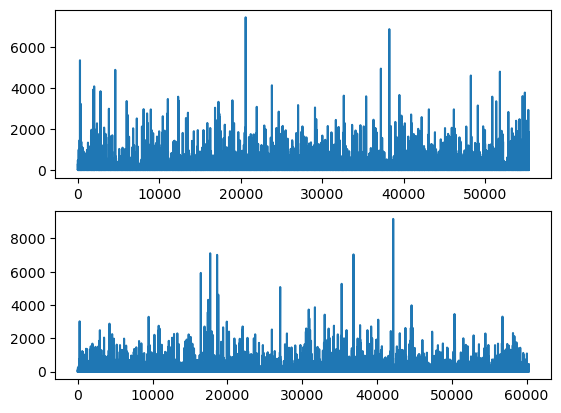

In [62]:
plt.subplot(2,1,1)
plt.plot(fajl['training_count_last_28_days'])
plt.subplot(2,1,2)
plt.plot(fajl_test['training_count_last_28_days'])
plt.show()


In [63]:
fajl = min_max_scaler(fajl,'training_count_last_28_days')
fajl_test = min_max_scaler(fajl_test, 'training_count_last_28_days')

In [64]:
fajl['global_competition_level'].value_counts()

global_competition_level
0.0     17551
1.0     10389
2.0      4898
3.0      3965
5.0      3701
6.0      3651
7.0      3458
4.0      3409
8.0      2374
9.0      1327
10.0      455
11.0      136
Name: count, dtype: int64

In [65]:
fajl = min_max_scaler(fajl,'global_competition_level')
fajl_test = min_max_scaler(fajl_test, 'global_competition_level')

In [66]:
fajl['tokens_spent_last_28_days'].value_counts()

tokens_spent_last_28_days
0       18799
5         712
2         526
10        386
20        336
        ...  
2162        1
3809        1
7809        1
2467        1
9413        1
Name: count, Length: 1530, dtype: int64

In [67]:
fajl = min_max_scaler(fajl,'tokens_spent_last_28_days')
fajl_test = min_max_scaler(fajl_test, 'tokens_spent_last_28_days')

In [68]:
fajl['tokens_stash'].value_counts()

tokens_stash
 9       1288
 10      1282
 4       1221
 7       1199
 11      1185
         ... 
 1963       1
-196        1
 6688       1
 873        1
 1280       1
Name: count, Length: 1642, dtype: int64

In [69]:
fajl = min_max_scaler(fajl,'tokens_stash')
fajl_test = min_max_scaler(fajl_test, 'tokens_stash')


In [70]:
fajl = min_max_scaler(fajl,'rests_stash')
fajl_test = min_max_scaler(fajl_test, 'rests_stash')

In [71]:
fajl = min_max_scaler(fajl,'morale_boosters_stash')
fajl_test = min_max_scaler(fajl_test, 'morale_boosters_stash')

In [73]:
fajl.drop(['league_id'], axis=1, inplace=True)


In [74]:
X_train = fajl.drop(['league_rank'], axis=1)
y_train = fajl['league_rank']

In [75]:
fajl_test.drop(['league_id'], axis=1, inplace=True)
X_test = fajl_test


In [76]:
print(X_test.shape)

(60270, 16)


In [77]:
print(X_train.shape)

(55314, 16)


In [78]:
print(y_train.shape)

(55314,)


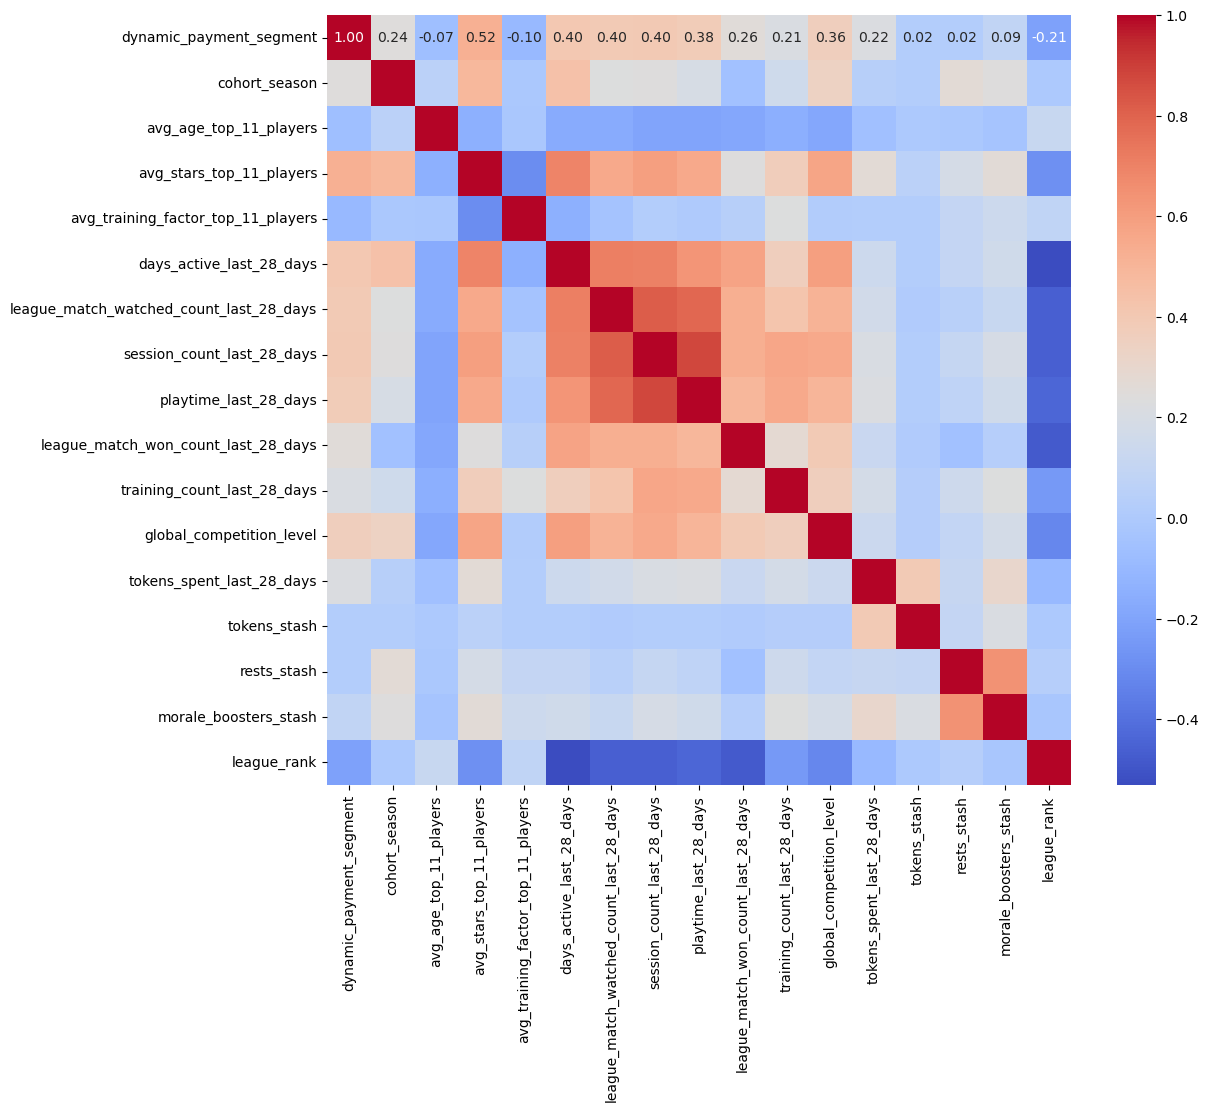

In [100]:
import seaborn as sns


correlation_matrix = fajl.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)


In [133]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.4021240057845263


In [155]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X_train and y_train are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an XGBoost Regressor model
xg_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.7, learning_rate=0.05,
                      max_depth=500, alpha=40, n_estimators=100)

# Train the model on the entire training set
xg_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_xgb = xg_reg.predict(X_train)

# Evaluate performance on the training set
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
print(f'Mean Absolute Error on Training Set (XGBoost): {mae_train_xgb}')

# Make predictions on the validation set
y_val_pred_xgb = xg_reg.predict(X_val)

# Evaluate performance on the validation set
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
print(f'Mean Absolute Error on Validation Set (XGBoost): {mae_val_xgb}')


Mean Absolute Error on Training Set (XGBoost): 1.9260305760135994
Mean Absolute Error on Validation Set (XGBoost): 2.461362189988056


In [79]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train and y_train are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_val_one_hot = encoder.transform(y_val.values.reshape(-1, 1))

print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

2023-11-10 04:05:41.179441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(52548, 14)
(2766, 14)


/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:

# Create a neural network model with 4 hidden layers
from sklearn.metrics import mean_absolute_error

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')  # Output layer with 14 neurons for 14 classes
])

# Compile the model
model.compile(optimizer='adam', loss='mean_', metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train_scaled, y_train_one_hot, epochs=2, batch_size=32, validation_data=(X_val_scaled, y_val_one_hot))

# Make predictions on the validation set
y_val_pred = np.argmax(model.predict(X_val_scaled), axis=1) + 1  # Adding 1 to convert back to original class labels
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=1) + 1

# Evaluate performance on the validation set
accuracy_nn0 = mean_absolute_error(y_train,y_train_pred)
accuracy_nn = mean_absolute_error(y_val, y_val_pred)

print(f'Accuracy (Neural Network): {accuracy_nn0}')

print(f'Accuracy (Neural Network): {accuracy_nn}')


Epoch 1/2


ValueError: in user code:

    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/losses.py", line 2663, in get
        return deserialize(identifier)
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "/home/oopsie/anaconda3/envs/oopsieenv/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'mean_'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [82]:
from sklearn.metrics import mean_absolute_error
accuracy_nn0 = mean_absolute_error(y_train,y_train_pred)
accuracy_nn = mean_absolute_error(y_val, y_val_pred)

print(f'Accuracy (Neural Network): {accuracy_nn0}')

print(f'Accuracy (Neural Network): {accuracy_nn}')

Accuracy (Neural Network): 2.9776204612925325
Accuracy (Neural Network): 3.0187997107736804


In [94]:
print(y_train_pred[:50])
print(y_train[60:100])

[14 14 14 14  6  7  1  3  7  7  2  2  1  2 14  7  4  5  5  1  4 11 14 14
  5  2 14 14 14  5 14  4  8  7 14 14  7 14 14 14 14  4 14  7 11  4 14  8
  7  7]
4828     10
1124      7
26791     4
3426      7
46712     7
30572    14
48620     3
5576     12
50169     7
11648    10
20766     9
38232     6
48954     6
38208     1
3120      2
49774    13
22312     7
54157     9
6556     14
44978    14
45081     4
28381     5
52973     1
35937     6
40596     4
39777     2
48879     2
6667      1
38986    11
147       5
3393      9
49855    14
50052     8
27309    14
9010     13
27833     3
42279    13
29800     8
49284    10
24598     3
Name: league_rank, dtype: int64


In [ ]:
[14 14 14 ...  1 14  4]
31249    12
40507    10
466      11
47425    12
19155     6
         ..
44732    10
54343    12
38158     1
860      13
15795     4
Name: league_rank, Length: 52548, dtype: int64
